In [1]:
import sys
sys.path.append('..')
# from src.evo_eq_model import *
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [3]:
import random
import numpy.random as rnd
# import networkx as nx
# from anytree import Node
from tqdm import tqdm
import numpy as np
import os
import re
import neo_originations.utils as ut
if(sys.version_info[1]<= 7):
    import pickle5 as pickle
else:
    import pickle

import pandas as pd
import scipy.interpolate as spi
import scipy.optimize as so
import scipy.stats as spst

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

from matplotlib.ticker import FuncFormatter

fmt = lambda x, pos: '{:.1f}'.format(x)
from numba import jit

#matplotlib.use('TkAgg')
from matplotlib.lines import Line2D
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
sns.set_theme(context='poster')
sns.set_style("white")
plt.rc('lines', linewidth=3.0)
plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams['axes.labelsize']=25
plt.rcParams['legend.fontsize']= 15
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['image.cmap']='coolwarm'
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['figure.titlesize'] = 30

2024-12-10 16:30:27.378 | INFO     | neo_originations.config:<module>:11 - PROJ_ROOT path is: /Users/dennytrimcev/Dropbox/Work_Main/Thesis/2_chapter


In [4]:
home = os.path.expanduser("~")
project_path =  os.path.relpath("..")
if project_path not in sys.path:
    sys.path.append(project_path)

sys.path.insert(1, project_path)
output_folder= project_path+'/report/figures/'
os.makedirs(output_folder, exist_ok = True)


In [5]:
%load_ext autoreload

In [10]:
%autoreload 
saves_folder = project_path + '/data/interim/2024-08-19_saves/'

freq_arr_all= np.load(saves_folder+'freq_arr_big_global.npz')

freq_arr = freq_arr_all['freq_arr_big_i']
# day_diff_vals = freq_arr_all['day_diff_vals']
alleles = freq_arr_all['alleles']
polarized_freq_arr = ut.get_polarized_freq_arr(freq_arr, time_dimension=1,threshold=1-1e-4)
# polarized_freqs = polarized_freq_arr['polarized_freq_arr']

100%|██████████| 29780/29780 [00:03<00:00, 8194.17it/s]


In [11]:
day_diff_vals = np.arange(0, freq_arr.shape[1])-32

Text(0.5, 0.98, 'Allele frequency distributions')

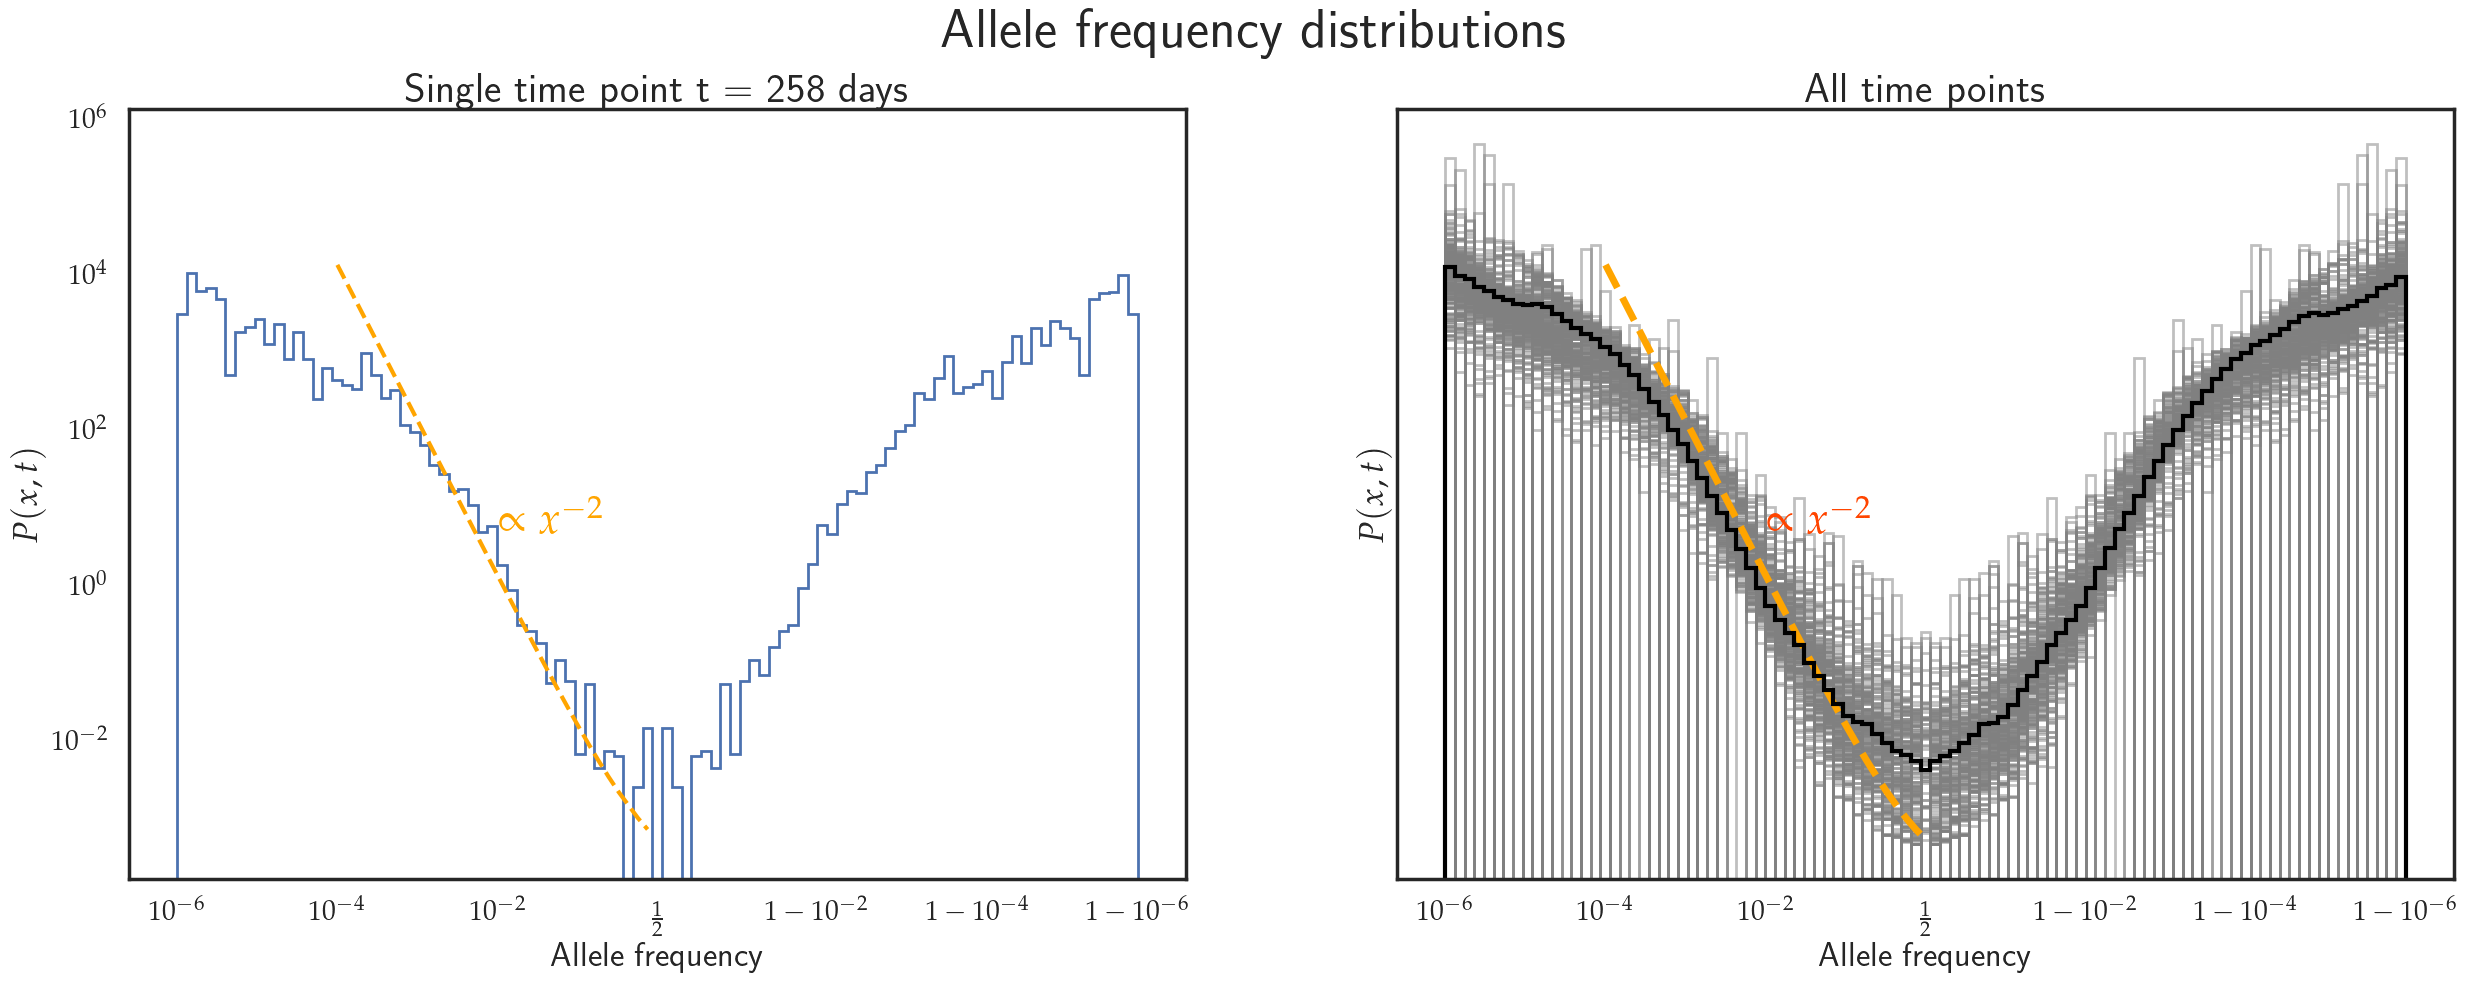

In [12]:
randind_t = rnd.randint(0, len(day_diff_vals))
# randind_t = 870/

allele_freqs_snapshot = freq_arr[:,randind_t,:]

logitbins = ut.logit_space(1e-6, 1-1e-6, 100)
fig,ax= plt.subplots(1,2,figsize=(30,10),sharey=True)


h,b,p = ax[0].hist(allele_freqs_snapshot.flatten(), bins=logitbins, histtype='step',density=True);
x = b[:-1]+0.5*np.diff(b)
y = h

# bs_law = 1/(x**2) *(x<.5) + 1/((x-1)*np.log(1-x)) *(x>0.5)
# bs_law/=np.sum(bs_law[1:]*np.diff(x))
# ax[0].plot(x, bs_law, color = 'green', linestyle = '--', label = f'BS law')

mask = (x>1e-4) & (x<0.5)
x = x[mask]
y = y[mask]

x = x[y>0]
y = y[y>0]

popt,pcov = so.curve_fit(lambda x,a: np.log10(a)-2*np.log10(x), x, np.log10(y))
plaw_fit = 10**(popt[0]-2*np.log10(x))
plaw_fit/=np.sum(plaw_fit[1:]*np.diff(x))



ax[0].plot(x, plaw_fit, color = 'orange', linestyle = '--', label = f'Power law fit: {10**popt[0]:.2f}x^{-2}')
ax[0].annotate(r'$\propto x^{-2}$', xy=(0.35, 0.45), xycoords='axes fraction', fontsize=30,color='orange')

ax[0].set_xscale('logit')
ax[0].set_yscale('log')

for ind_t in range(0,len(day_diff_vals),5):
    allele_freqs_snapshot = freq_arr[:,ind_t,:]

    h,b,p = ax[1].hist(allele_freqs_snapshot.flatten(), bins=logitbins, histtype='step',density=True,color='grey',alpha=.5);
    x = b[:-1]+0.5*np.diff(b)
    y = h

    # bs_law = 1/(x**2) *(x<.5) + 1/((x-1)*np.log(1-x)) *(x>0.5)
    # bs_law/=np.sum(bs_law[1:]*np.diff(x))
    # ax[1].plot(x, bs_law, color = 'green', linestyle = '--', label = f'BS law')

    # mask = (x>1e-4) & (x<0.5)
    # x = x[mask]
    # y = y[mask]

    # x = x[y>0]
    # y = y[y>0]

    # popt,pcov = so.curve_fit(lambda x,a: np.log10(a)-2*np.log10(x), x, np.log10(y))
    # plaw_fit = 10**(popt[0]-2*np.log10(x))
    # plaw_fit/=np.sum(plaw_fit[1:]*np.diff(x))



x= logitbins[:-1]+0.5*np.diff(logitbins)
mask = (x>1e-4) & (x<0.5)
x = x[mask]

plaw =x**-2
plaw/=np.sum(plaw[1:]*np.diff(x))

# x2 = logitbins[:-1]+0.5*np.diff(logitbins)
# mask2 = x2>.5
# x2 = x2[mask2]

# plaw2 = (1-x2)**-2
# plaw2/=np.sum(plaw2[1:]*np.diff(x2))


ax[1].plot(x, plaw, linestyle = '--',color='orange',lw=5)
# ax[1].plot(x2, 10*plaw2, linestyle = '--',color='purple',lw=5)

ax[1].annotate(r'$\propto x^{-2}$', xy=(0.35, 0.45), xycoords='axes fraction', fontsize=30,color='orangered')
h,b,p = ax[1].hist(freq_arr.flatten(), bins=logitbins, histtype='step',color='black',density=True,lw=3);


ax[1].set_xscale('logit')
ax[1].set_yscale('log')

ax[0].set_xlabel('Allele frequency')
ax[1].set_xlabel('Allele frequency')

ax[0].set_ylabel(r'$P(x,t)$')
ax[1].set_ylabel(r'$P(x,t)$')

ax[0].set_title('Single time point' + f' t = {day_diff_vals[randind_t]} days', fontsize=30)
ax[1].set_title('All time points', fontsize=30)
fig.suptitle('Allele frequency distributions', fontsize=40)

# plt.savefig(output_folder+'allele_freq_distributions.pdf',bbox_inches='tight')

In [13]:
np.max(polarized_freq_arr)

0.9998997508271636

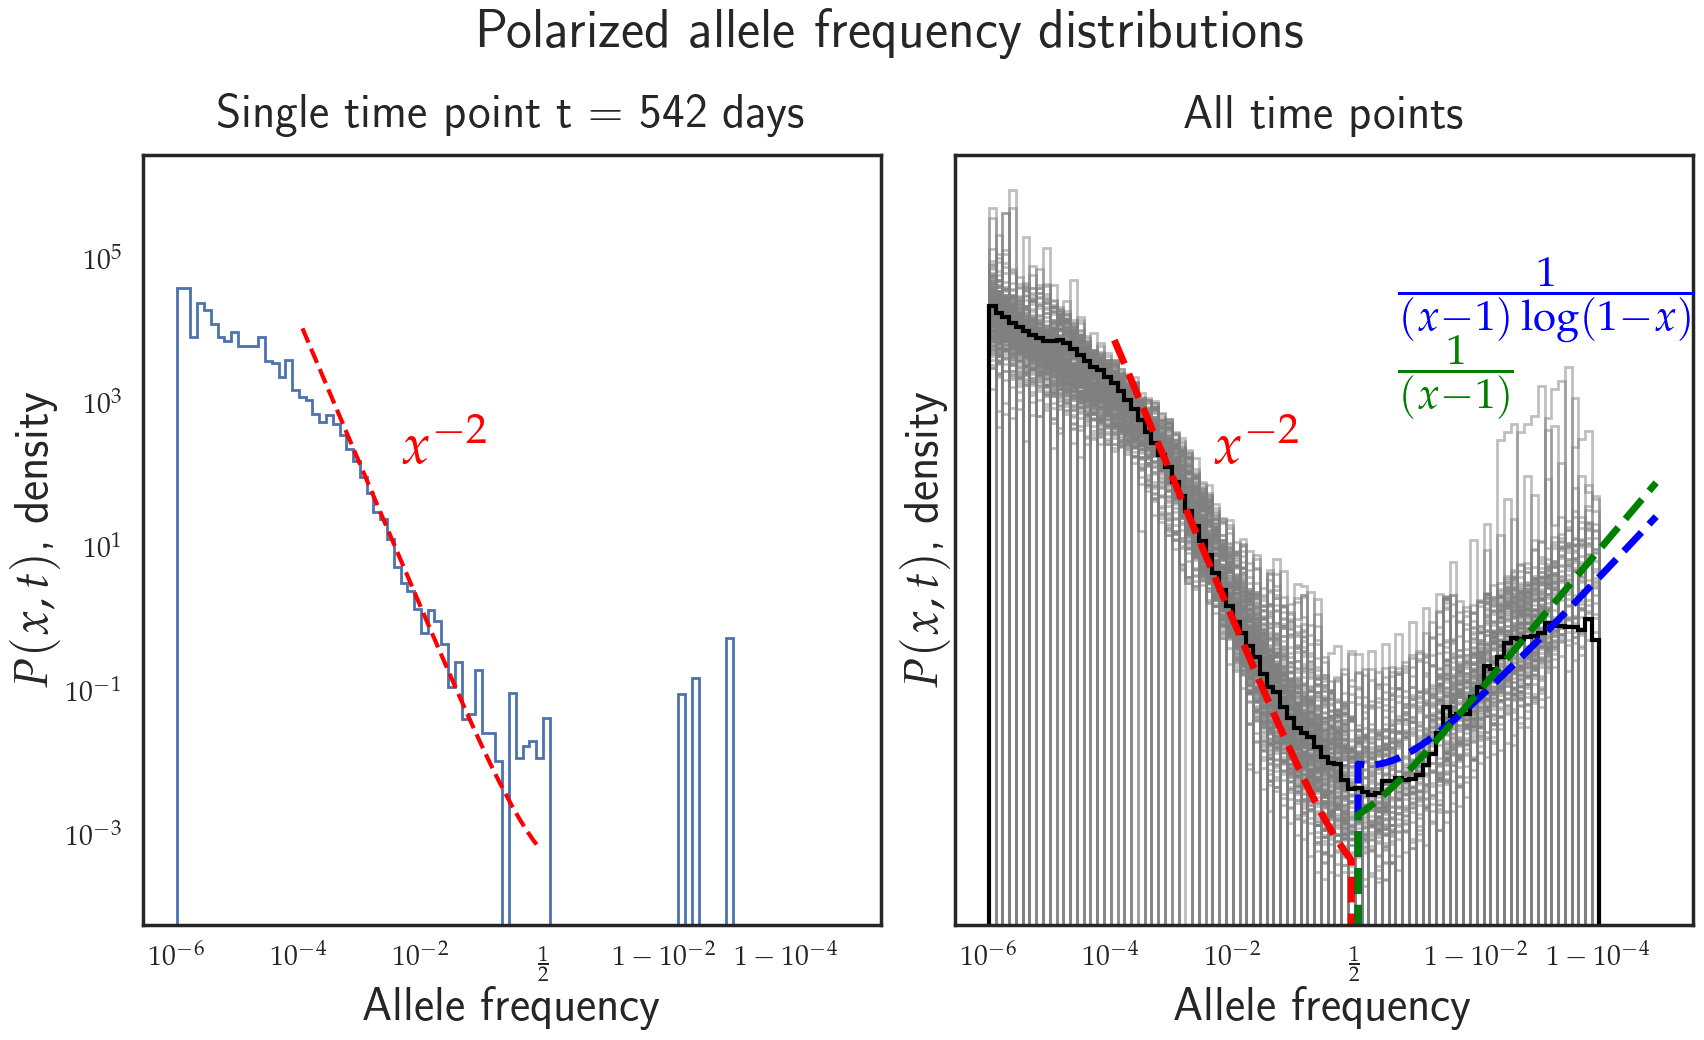

In [ ]:
randind_t = rnd.randint(0, len(day_diff_vals))
# randind_t = 870/

allele_freqs_snapshot = polarized_freq_arr[:,randind_t,:]

logitbins = ut.logit_space(1e-6, 1-1e-5, 100)
fig,ax= plt.subplots(1,2,figsize=(20,10),sharey=True)
plt.subplots_adjust(wspace=0.1)

h,b,p = ax[0].hist(allele_freqs_snapshot.flatten(), bins=logitbins, histtype='step',density=True);
x = b[:-1]+0.5*np.diff(b)
y = h

# bs_law = 1/(x**2) *(x<.5) + 1/((x-1)*np.log(1-x)) *(x>0.5)
# bs_law/=np.sum(bs_law[1:]*np.diff(x))
# ax[0].plot(x, bs_law, color = 'green', linestyle = '--', label = f'BS law')

mask = (x>1e-4) & (x<0.5)
x = x[mask]
y = y[mask]

x = x[y>0]
y = y[y>0]

popt,pcov = so.curve_fit(lambda x,a: np.log10(a)-2*np.log10(x), x, np.log10(y))
plaw_fit = 10**(popt[0]-2*np.log10(x))
plaw_fit/=np.sum(plaw_fit[1:]*np.diff(x))



ax[0].plot(x, plaw_fit, color = 'red', linestyle = '--', label = f'Power law fit: {10**popt[0]:.2f}x^{-2}')
ax[0].annotate(r'$x^{-2}$', xy=(0.35, 0.6), textcoords='axes fraction',fontsize=40, color = 'red')

ax[0].set_xscale('logit')
ax[0].set_yscale('log')
fits= []
for ind_t in range(0,len(day_diff_vals),5):
    allele_freqs_snapshot = polarized_freq_arr[:,ind_t:ind_t+5,:]

    h,b,p = ax[1].hist(allele_freqs_snapshot.flatten(), bins=logitbins, histtype='step',density=True,color='grey',alpha=.5);
    x = b[:-1]+0.5*np.diff(b)
    y = h

    mask = (x>1e-4) & (x<.5)

    xm = x[mask]
    ym = y[mask]
    # f = lambda x,a,b: a/((x-1)*np.log(1-x))
    f = lambda x,a,b: a/(x**2)
    try:
        popt,pcov = so.curve_fit(f, xm,ym)
    except ValueError:
        popt = np.array([np.nan])
    fits.append(popt[0])
    



x= logitbins[:-1]+0.5*np.diff(logitbins)
mask = (x>1e-4) & (x<0.5)
x = x[mask]

plaw =x**-2
plaw/=np.sum(plaw[1:]*np.diff(x))

h_tot,b_tot,p_tot = ax[1].hist(polarized_freq_arr.flatten(), bins=logitbins, histtype='step',color='black',density=True,lw=3);


x = b_tot[:-1]+0.5*np.diff(b_tot)


left_law = x**-2 * (x<0.5) * (x>1e-4)
right_law = (x>0.5) * 1/((x-1)*np.log(1-x))
left_law = left_law/np.sum(left_law*np.diff(b_tot))
right_law = right_law/np.sum(right_law*np.diff(b_tot))

right_law_m1 = (x>0.5) * 1/((x-1))
right_law_m1 = right_law_m1/np.sum(right_law_m1*np.diff(b_tot))


left_law_m1 = x**(-1/2) * (x<1e-3) * (x>1e-6)
left_law_m1 = left_law_m1/np.sum(left_law_m1*np.diff(b_tot))


ax[1].plot(x[x>1e-4], left_law[x>1e-4], color = 'red', linestyle = '--', label = f'x^-2',lw=5)
ax[1].annotate(r'$x^{-2}$', xy=(0.35, 0.6), textcoords='axes fraction',fontsize=40, color = 'red')


# ax[1].plot(x, left_law_m1, color = 'green', linestyle = '--', label = f'1/x',lw=5)
# ax[1].annotate(r'$x^{-1}$', xy=(0.35, 0.35), textcoords='axes fraction',fontsize=40, color = 'blue')

ax[1].plot(x, right_law/100, color = 'blue', linestyle = '--', label = f'1/(x-1)',lw=5)
ax[1].annotate(r'$\frac{1}{(x-1)\log(1-x)}$', xy=(0.6, 0.65+.15), textcoords='axes fraction',fontsize=40, color = 'blue')

ax[1].plot(x, right_law_m1/100, color = 'green', linestyle = '--', label = f'1/(x-1)',lw=5)
ax[1].annotate(r'$\frac{1}{(x-1)}$', xy=(0.6, 0.55+.15), textcoords='axes fraction',fontsize=40, color = 'green')

ax[1].set_xscale('logit')
ax[1].set_yscale('log')

ax[0].set_xlabel('Allele frequency', fontsize=35)
ax[1].set_xlabel('Allele frequency', fontsize=35)

ax[0].set_ylabel(r'$P(x,t)$, density', fontsize=35)
ax[1].set_ylabel(r'$P(x,t)$, density', fontsize=35)
# ax[1].set_xlim(1e-4,1-1e-4)
ax[0].set_title('Single time point' + f' t = {day_diff_vals[randind_t]} days', fontsize=35, pad= 20)
ax[1].set_title('All time points', fontsize=35, pad= 20)
fig.suptitle('Polarized allele frequency distributions', fontsize=40, y=1.025)

# plt.savefig(output_folder+'fig2.pdf',bbox_inches='tight')
